In [21]:
import os

os.environ["SEED"] = "0"
import numpy as np
import pandas as pd
from ConfigSpace import Configuration

from src.aac.AAC import AAC
from src.configuration_space.LKH import CONFIGURATION_SPACE
from src.constant import DATA_DIR
from src.database import DB
from src.instance.Instance import Instance
from src.instance.TSP_Instance import TSP_Instance, TSP_train_test_from_index_file
from src.solver.Portfolio import Portfolio
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver
from src.instance.InstanceList import InstanceList

In [2]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(random_state=0)

# X = np.random.uniform(size=(200, 137))
# y = np.random.uniform(size=(200,))
# model.fit(X, y)

In [3]:
train_instances, test_instances = TSP_train_test_from_index_file(
    filepath=DATA_DIR / "TSP" / "CEPS_benchmark" / "index.json",
    train_size=3,
)
train_instances

InstanceList(size=3)[TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/21.tsp), TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp), TSP_Instance(filepath=TSP/CEPS_benchmark/compression/09.tsp)]

In [4]:
portfolio = Portfolio.from_solver_class(TSP_LKH_Solver, size=1)
portfolio

Portfolio(size=1)[Solver(id=52980316141715150)]

In [5]:
aac = AAC(
    prefix="config",
    portfolio=portfolio,
    t_c=1200,
    i=0,
    calculate_features=False,
)
aac.configure(train_instances, estimator=None)

[2024-12-26 19:18:32] DEBUG     AAC(prefix=xd, iter=1, configuration_time=[1200.00])
[2024-12-26 19:18:32] DEBUG     Portfolio.evaluate(xd;aac_iter=1)
[2024-12-26 19:18:32] DEBUG     Portfolio(size=1)[Solver(id=52980316141715150)]
[2024-12-26 19:18:32] DEBUG     solve(prefix=xd;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/21.tsp))
[2024-12-26 19:18:32] DEBUG     solve(prefix=xd;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp))
[2024-12-26 19:18:32] DEBUG     solve(prefix=xd;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/compression/09.tsp))
[2024-12-26 19:18:44] DEBUG     Solver.Result(prefix=xd;aac_iter=1, solver=Solver(id=52980316141715150), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/rotation/34.tsp), cost=100.00, time=10.00, cached=False, surrogate=False, error=False)
[2024-12-26 19:18:48] DEBUG 

Portfolio(size=1)[Solver(id=1698116714322918352)]

In [23]:
portfolio.evaluate(
    InstanceList.from_iterable(test_instances[:10]),
    prefix="test",
)

[2024-12-26 20:07:05] DEBUG     Portfolio.evaluate(test)
[2024-12-26 20:07:05] DEBUG     Portfolio(size=1)[Solver(id=1698116714322918352)]
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/implosion/34.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/linearprojection/25.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/cluster_netgen/21.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/linearprojection/28.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=test, solver=Solver(id=1698116714322918352), instance=TSP_Instance(filepath=TSP/CEPS_benchmark/explosion/05.tsp))
[2024-12-26 20:07:05] DEBUG     solve(prefix=te

Portfolio.Result(prefix=test, cost=42.21, time=[62.06])

In [6]:
db = DB()

In [7]:
pd.read_sql_query("SELECT * FROM instances", db._conn)

,id,filepath,optimum
0,855157651668393360,TSP/CEPS_benchmark/explosion/21.tsp,14928292.0
1,1353678304570487518,TSP/CEPS_benchmark/rotation/34.tsp,15486460.0
2,810870798045289410,TSP/CEPS_benchmark/compression/09.tsp,16003060.0


In [8]:
pd.read_sql_query("SELECT * FROM solvers", db._conn)

,id,ASCENT_CANDIDATES,BACKBONE_TRIALS,BACKTRACKING,CANDIDATE_SET_TYPE,EXTRA_CANDIDATES,EXTRA_CANDIDATE_SET_TYPE,GAIN23,GAIN_CRITERION,INITIAL_STEP_SIZE,...,MAX_BREADTH,MAX_CANDIDATES,MOVE_TYPE,PATCHING_A,PATCHING_C,POPULATION_SIZE,RESTRICTED_SEARCH,SUBGRADIENT,SUBSEQUENT_MOVE_TYPE,SUBSEQUENT_PATCHING
0,52980316141715150,0.60,1.0,0.0,0.0,0.7,0.0,1.0,0.0,0.00,...,0.444643,1.000000,0.25,0.6,0.2,0.061224,0.0,0.0,5.0,1.0
1,287011037061967493,0.75,0.0,0.0,0.0,0.3,0.0,1.0,0.0,0.00,...,0.592453,0.777778,0.75,0.8,0.2,0.836735,1.0,1.0,3.0,1.0
2,176228367859327934,0.85,1.0,0.0,0.0,0.4,0.0,0.0,1.0,0.50,...,0.354664,0.333333,0.25,0.8,0.4,0.408163,1.0,1.0,2.0,0.0
3,2041120758543581287,0.80,1.0,0.0,2.0,0.7,0.0,1.0,0.0,0.25,...,0.365942,1.000000,0.25,0.6,0.8,0.051020,0.0,1.0,5.0,0.0
4,1056464823932360013,0.65,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.00,...,0.322513,0.666667,1.00,0.8,0.8,0.112245,0.0,1.0,2.0,1.0
5,1618467634991678120,0.20,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.75,...,0.345009,0.000000,1.00,0.0,0.0,0.826531,0.0,1.0,5.0,1.0
6,885593931183508669,0.30,0.0,0.0,3.0,0.4,0.0,0.0,1.0,0.25,...,0.686588,0.555556,0.00,0.2,0.4,0.418367,1.0,0.0,1.0,1.0
7,2037795053511545649,0.55,1.0,1.0,3.0,0.3,0.0,0.0,1.0,0.75,...,0.904777,0.222222,1.00,0.6,1.0,0.051020,0.0,1.0,2.0,1.0
8,1711584254718207942,0.60,0.0,1.0,2.0,0.6,0.0,0.0,0.0,1.00,...,0.031848,0.444444,0.75,0.0,0.0,0.448980,0.0,1.0,1.0,0.0
9,1101991737098596273,0.50,0.0,1.0,1.0,0.8,0.0,0.0,1.0,0.25,...,0.497283,0.222222,0.25,0.2,0.6,0.653061,0.0,1.0,2.0,0.0


In [10]:
pd.read_sql_query("SELECT * FROM solvers", db._conn)

,id,ASCENT_CANDIDATES,BACKBONE_TRIALS,BACKTRACKING,CANDIDATE_SET_TYPE,EXTRA_CANDIDATES,EXTRA_CANDIDATE_SET_TYPE,GAIN23,GAIN_CRITERION,INITIAL_STEP_SIZE,...,MAX_BREADTH,MAX_CANDIDATES,MOVE_TYPE,PATCHING_A,PATCHING_C,POPULATION_SIZE,RESTRICTED_SEARCH,SUBGRADIENT,SUBSEQUENT_MOVE_TYPE,SUBSEQUENT_PATCHING
0,52980316141715150,0.60,1.0,0.0,0.0,0.7,0.0,1.0,0.0,0.00,...,0.444643,1.000000,0.25,0.6,0.2,0.061224,0.0,0.0,5.0,1.0
1,287011037061967493,0.75,0.0,0.0,0.0,0.3,0.0,1.0,0.0,0.00,...,0.592453,0.777778,0.75,0.8,0.2,0.836735,1.0,1.0,3.0,1.0
2,176228367859327934,0.85,1.0,0.0,0.0,0.4,0.0,0.0,1.0,0.50,...,0.354664,0.333333,0.25,0.8,0.4,0.408163,1.0,1.0,2.0,0.0
3,2041120758543581287,0.80,1.0,0.0,2.0,0.7,0.0,1.0,0.0,0.25,...,0.365942,1.000000,0.25,0.6,0.8,0.051020,0.0,1.0,5.0,0.0
4,1056464823932360013,0.65,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.00,...,0.322513,0.666667,1.00,0.8,0.8,0.112245,0.0,1.0,2.0,1.0
5,1618467634991678120,0.20,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.75,...,0.345009,0.000000,1.00,0.0,0.0,0.826531,0.0,1.0,5.0,1.0
6,885593931183508669,0.30,0.0,0.0,3.0,0.4,0.0,0.0,1.0,0.25,...,0.686588,0.555556,0.00,0.2,0.4,0.418367,1.0,0.0,1.0,1.0
7,2037795053511545649,0.55,1.0,1.0,3.0,0.3,0.0,0.0,1.0,0.75,...,0.904777,0.222222,1.00,0.6,1.0,0.051020,0.0,1.0,2.0,1.0
8,1711584254718207942,0.60,0.0,1.0,2.0,0.6,0.0,0.0,0.0,1.00,...,0.031848,0.444444,0.75,0.0,0.0,0.448980,0.0,1.0,1.0,0.0
9,1101991737098596273,0.50,0.0,1.0,1.0,0.8,0.0,0.0,1.0,0.25,...,0.497283,0.222222,0.25,0.2,0.6,0.653061,0.0,1.0,2.0,0.0


In [24]:
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results

,id,prefix,solver_id,instance_id,cost,time,cached,surrogate,error
0,xd;aac_iter=1_52980316141715150_13536783045704...,xd;aac_iter=1,52980316141715150,1353678304570487518,100.00,10.00,0,0,0
1,xd;aac_iter=1_52980316141715150_85515765166839...,xd;aac_iter=1,52980316141715150,855157651668393360,100.00,10.00,0,0,0
2,xd;aac_iter=1_52980316141715150_81087079804528...,xd;aac_iter=1,52980316141715150,810870798045289410,100.00,10.00,0,0,1
3,xd;aac_iter=2_287011037061967493_8551576516683...,xd;aac_iter=2,287011037061967493,855157651668393360,100.00,10.00,0,0,0
4,xd;aac_iter=2_287011037061967493_1353678304570...,xd;aac_iter=2,287011037061967493,1353678304570487518,100.00,10.00,0,0,0
...,...,...,...,...,...,...,...,...,...
134,test_1698116714322918352_1332557866284463562,test,1698116714322918352,1332557866284463562,100.00,10.00,0,0,0
135,test_1698116714322918352_353184874406680619,test,1698116714322918352,353184874406680619,100.00,10.00,0,0,0
136,test_1698116714322918352_1187398686802014606,test,1698116714322918352,1187398686802014606,3.33,3.33,0,0,0
137,test_1698116714322918352_2038991079631960945,test,1698116714322918352,2038991079631960945,100.00,10.00,0,0,0


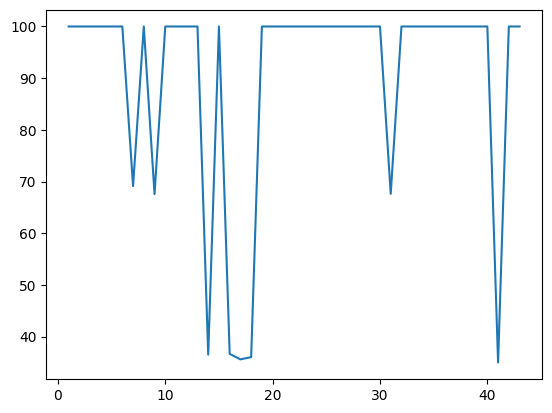

In [15]:
import matplotlib.pyplot as plt
_ = results.groupby(["prefix", "instance_id"])["cost"].min().reset_index().groupby("prefix")["cost"].mean().reset_index()
_.loc[:, "aac_iter"] = _["prefix"].str.extract(r'aac_iter=(\d+)').astype(int)
_ = _.sort_values("aac_iter")
plt.plot(_["aac_iter"], _["cost"])

In [13]:
pd.read_sql_query("SELECT * FROM results", db._conn)

,id,prefix,solver_id,instance_id,cost,time,cached,surrogate,error
0,xd;aac_iter=1_52980316141715150_13536783045704...,xd;aac_iter=1,52980316141715150,1353678304570487518,100.0,10.0,0,0,0
1,xd;aac_iter=1_52980316141715150_85515765166839...,xd;aac_iter=1,52980316141715150,855157651668393360,100.0,10.0,0,0,0
2,xd;aac_iter=1_52980316141715150_81087079804528...,xd;aac_iter=1,52980316141715150,810870798045289410,100.0,10.0,0,0,1
3,xd;aac_iter=2_287011037061967493_8551576516683...,xd;aac_iter=2,287011037061967493,855157651668393360,100.0,10.0,0,0,0
4,xd;aac_iter=2_287011037061967493_1353678304570...,xd;aac_iter=2,287011037061967493,1353678304570487518,100.0,10.0,0,0,0
...,...,...,...,...,...,...,...,...,...
124,xd;aac_iter=42_1967053331414198389_13536783045...,xd;aac_iter=42,1967053331414198389,1353678304570487518,100.0,10.0,0,0,0
125,xd;aac_iter=42_1967053331414198389_81087079804...,xd;aac_iter=42,1967053331414198389,810870798045289410,100.0,10.0,0,0,0
126,xd;aac_iter=43_1030031898937705875_85515765166...,xd;aac_iter=43,1030031898937705875,855157651668393360,100.0,10.0,0,0,0
127,xd;aac_iter=43_1030031898937705875_81087079804...,xd;aac_iter=43,1030031898937705875,810870798045289410,100.0,10.0,0,0,0


In [14]:
pd.read_sql_query("SELECT * FROM evaluations", db._conn)

,id,solver_id,instance_id,cost
0,52980316141715150_1353678304570487518,52980316141715150,1353678304570487518,100.0
1,52980316141715150_855157651668393360,52980316141715150,855157651668393360,100.0
2,52980316141715150_810870798045289410,52980316141715150,810870798045289410,100.0
3,287011037061967493_855157651668393360,287011037061967493,855157651668393360,100.0
4,287011037061967493_1353678304570487518,287011037061967493,1353678304570487518,100.0
...,...,...,...,...
124,1967053331414198389_1353678304570487518,1967053331414198389,1353678304570487518,100.0
125,1967053331414198389_810870798045289410,1967053331414198389,810870798045289410,100.0
126,1030031898937705875_855157651668393360,1030031898937705875,855157651668393360,100.0
127,1030031898937705875_810870798045289410,1030031898937705875,810870798045289410,100.0
